## Predicting Used Car Prices Using Regression Analysis - by Darshi Doluwarawatta

### Metrics
Since the dataset is scraped from the UK, the currency of the price is in pounds, and the UK's mpg is not equivalent to the U.S.'s mpg. To make my analysis relevant and comparable in the U.S., I converted the price from pounds to the US currency dollar by multiplying a factor of 1.37. I also converted UK's mpg to the U.S.'s mpg by multiplying a factor of 0.83.

### Problems
##### How can forecast a cars price within a +-10% Price Range through the identification of at least 3 key variables?
##### How can implement a regression model to prdict a used car's value?



In [77]:
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy.stats import chi2_contingency
%matplotlib inline

In [78]:
files = ['audi.csv','bmw.csv','ford.csv','hyundi.csv','merc.csv','skoda.csv','toyota.csv','vauxhall.csv','vw.csv']
dfs = ['audi','bmw','ford','hyundi','merc','skoda','toyota','vauxhall','vw']

# Read CSV files and merge
dataframe = []
for file in files:
    dataframe.append(pd.read_csv(file))
    
df = pd.concat(dataframe, axis='rows')

# Rename columns and add column age
df.rename(columns = {'fuelType':'fuel_type', 'engineSize':'engine_size'}, inplace=True)
df['age'] = 2021 - df['year']



# Shape and preview of dataset
df.shape
df.head(10)

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,tax(£),age
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN,4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN,5
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN,5
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN,4
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN,2
5,Audi,A1,2016,13900,Automatic,32260,Petrol,30.0,58.9,1.4,NaN,5
6,Audi,A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0,NaN,5
7,Audi,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,NaN,5
8,Audi,A3,2015,10200,Manual,46112,Petrol,20.0,60.1,1.4,NaN,6
9,Audi,A1,2016,12000,Manual,22451,Petrol,30.0,55.4,1.4,NaN,5


### Data Cleaning

In [79]:
# shape of the dataframe
df.shape

(99187, 12)

In [80]:
# data type of each column
df.dtypes

brand            object
model            object
year              int64
price             int64
transmission     object
mileage           int64
fuel_type        object
tax             float64
mpg             float64
engine_size     float64
tax(£)          float64
age               int64
dtype: object

In [81]:
# number of na values
df.isna().sum()

brand               0
model               0
year                0
price               0
transmission        0
mileage             0
fuel_type           0
tax              4860
mpg                 0
engine_size         0
tax(£)          94327
age                 0
dtype: int64

In [82]:
# number of na values
df.isna().sum()

brand               0
model               0
year                0
price               0
transmission        0
mileage             0
fuel_type           0
tax              4860
mpg                 0
engine_size         0
tax(£)          94327
age                 0
dtype: int64

In [83]:
# number of unique values 
df.nunique()

brand               9
model             195
year               27
price           13236
transmission        4
mileage         42214
fuel_type           5
tax                48
mpg               208
engine_size        40
tax(£)             24
age                27
dtype: int64

In [84]:
# summary statistics
df.describe()

,year,price,mileage,tax,mpg,engine_size,tax(£),age
count,99187.000000,99187.000000,99187.000000,94327.000000,99187.000000,99187.000000,4860.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.256183,55.166825,1.663280,121.147119,3.912277
std,2.123934,9866.773417,21148.523721,63.404805,16.138522,0.557646,58.003289,2.123934
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,0.000000,-39.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000,125.000000,2.000000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000,145.000000,4.000000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000,145.000000,5.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000,51.000000


In [85]:
brand_no = df.brand.nunique()
brands = df.brand.unique()
print("This dataframe has {} unique brand values with the following:{}".format(brand_no, brands))

This dataframe has 9 unique brand values with the following:['Audi' 'BMW' 'Ford' 'Hyundi' 'Merc' 'Skoda' 'Toyota' 'Vauxhall' 'VW']


In [86]:
print("As the seller has no control over tax, it was deemed as an unnecessary variable and was dropped")
df = df.drop('tax', axis=1)

As the seller has no control over tax, it was deemed as an unnecessary variable and was dropped


In [87]:
df = df.drop('tax(£)', axis=1)

In [88]:
# convert all numerical variables to numeric values
df[['year','price','mileage']] = df[['year','price','mileage']].apply(pd.to_numeric)
df[['mpg','engine_size']] = df[['mpg','engine_size']].apply(pd.to_numeric)

# convert price in pounds to dollars 
df['price'] = df['price'] * 1.37

# convert UK's mpg to the U.S.'s mpg by multiplying by 0.83
df['mpg'] = df['mpg'] * 0.83

# convert price, mileage, age, and mpg to integers
df[['year','price','mileage','mpg']] = df[['year','price','mileage','mpg']].astype(int)

In [89]:
print("Cars from earlier than 1995 and later than 2020 were dropped.")
index_2020 = df[df['year']>2020].index
index_1995 = df[df['year']<1995].index
indexes = [index_2020, index_1995]
for i in indexes:
    df = df.drop(i)

Cars from earlier than 1995 and later than 2020 were dropped.


In [90]:
print("Cars with odometers reading more than 250k were dropped, and \
cars with odometers reading less than 100 miles were also dropped as they were considered as new cars.")
index_miles250k = df[df['mileage'] > 250000].index
index_miles100 = df[df['mileage'] < 100].index
indexes = [index_miles250k ,index_miles100]
for i in indexes:
    df = df.drop(i)

Cars with odometers reading more than 250k were dropped, and cars with odometers reading less than 100 miles were also dropped as they were considered as new cars.


In [92]:
# drop prices that are unreasonable
a = df.price[df['price'] > 100000].count()
b = df.price[df['price'] < 1000].count()
c = df.price.count()
print("Cars that were listed as more than $100,000 were dropped. \
There were only {0} out of {1} data points that has over 100k price value. It addresses only a small percentage of buyers. \
In addition, there were {2} cars that has a price lower than $1,000. \
These values were also dropped from the dataframe because these prices are noise for the data.".format(a, c, b))

index_price100k = df[df['price'] > 100000].index
index_price1k = df[df['price'] < 1000].index
indexes = [index_price100k, index_price1k]
for i in indexes:
    df = df.drop(i)

Cars that were listed as more than $100,000 were dropped. There were only 0 out of 81442 data points that has over 100k price value. It addresses only a small percentage of buyers. In addition, there were 0 cars that has a price lower than $1,000. These values were also dropped from the dataframe because these prices are noise for the data.


In [93]:
print('Drop datapoints with 0 engine size and mpg <10.')
enginesize0 = df[df.engine_size == 0].index
df = df.drop(enginesize0)
df = df.drop(df[df.mpg<10].index)

Drop datapoints with 0 engine size and mpg <10.


In [94]:
# Relabel semi-automatic transmission as manual as they are still reliant on a clutch. 
# Researched the cars labeled as 'Other' and categorized them as automatic transmissions. 
df.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [95]:
d = {'Other':'Automatic', 'Semi-Auto':'Manual'}
df.transmission = df.transmission.replace(d)

In [96]:
# Relabel Petroleum as Gasoline
# Reassign 'Automatic' values as Gasoline
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [97]:
f = {'Petrol':'Gasoline','Other':'Gasoline'}
df.fuel_type = df.fuel_type.replace(f)

In [98]:
df.reset_index(drop=True)

,brand,model,year,price,transmission,mileage,fuel_type,mpg,engine_size,age
0,Audi,A1,2017,17125,Manual,15735,Gasoline,45,1.4,4
1,Audi,A6,2016,22605,Automatic,36203,Diesel,53,2.0,5
2,Audi,A1,2016,15070,Manual,29946,Gasoline,45,1.4,5
3,Audi,A4,2017,23016,Automatic,25952,Diesel,55,2.0,4
4,Audi,A3,2017,22468,Manual,21695,Gasoline,48,1.4,4
...,...,...,...,...,...,...,...,...,...,...
79943,VW,Eos,2012,8206,Manual,74000,Diesel,48,2.0,9
79944,VW,Fox,2008,2464,Manual,88102,Gasoline,38,1.2,13
79945,VW,Fox,2009,2178,Manual,70000,Gasoline,34,1.4,12
79946,VW,Fox,2006,1712,Manual,82704,Gasoline,38,1.2,15


In [99]:
# save and export clean dataset to csv
df.to_csv('clean used car dataset.csv')

### Exploratory Data Analysis Using Data Visualizations

### Descriptive analysis

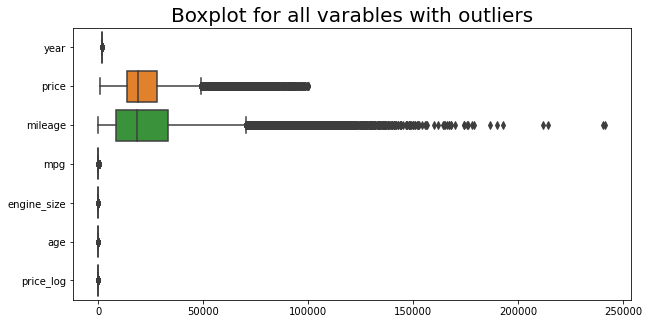

The average price of used cars is  $22,537.
The average year of used cars is  $2,017.
The average mileage of used cars is  $23,837.
The average mpg of used cars is  $45.
The average engine_size of used cars is  $2.
The average age of used cars is  $4.


In [171]:
plt.figure(figsize=(10,5))
bp = sns.boxplot(data=df, orient='h')
bp.set_title('Boxplot for all varables with outliers', fontsize=20)
plt.savefig('Boxplot for all variables.png', bbox_inches='tight', dpi=300)
plt.show()
print('The average price of used cars is  ${:,.0f}.'.format(df.price.mean()))
print('The average year of used cars is  ${:,.0f}.'.format(df.year.mean()))
print('The average mileage of used cars is  ${:,.0f}.'.format(df.mileage.mean()))
print('The average mpg of used cars is  ${:,.0f}.'.format(df.mpg.mean()))
print('The average engine_size of used cars is  ${:,.0f}.'.format(df.engine_size.mean()))
print('The average age of used cars is  ${:,.0f}.'.format(df.age.mean()))

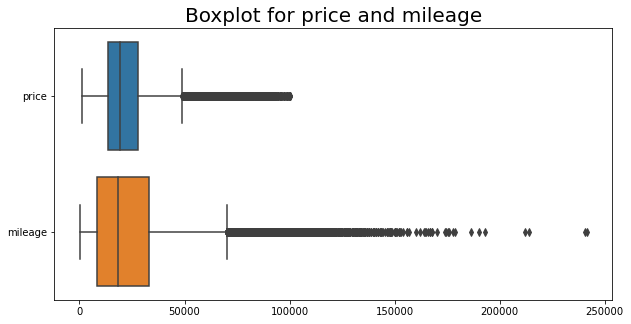

The average price of used cars is  $22,537.
The average mileage of used cars is  $23,837.


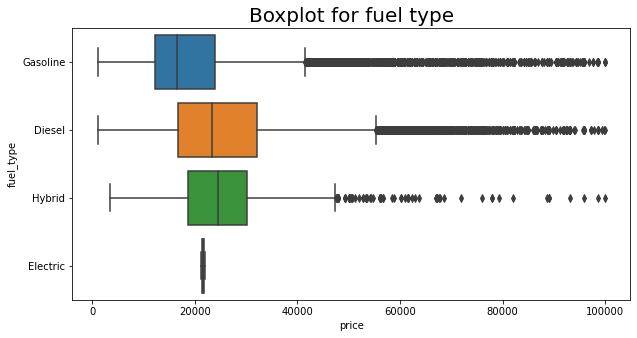

Cars running on Gasoline have an average price of $19,697.
Cars running on Diesel have an average price of $26,071.
Hybrid cars have an average price of $25,944.
Electric cars have an average price of $21,560.


In [100]:
# variables
df_1 = df[['price','mileage']]
df_2 = df['fuel_type']

# box plots for price and mileage
plt.figure(figsize=(10,5))
bp = sns.boxplot(data=df_1, orient='h')
bp.set_title('Boxplot for price and mileage', fontsize=20)
plt.savefig('Boxplot for price and mileage.png', bbox_inches='tight', dpi=300)
plt.show()
print('The average price of used cars is  ${:,.0f}.'.format(df.price.mean()))
print('The average mileage of used cars is  ${:,.0f}.'.format(df.mileage.mean()))

# box plot for fuel type
plt.figure(figsize=(10,5))
bp2 = sns.boxplot(y=df_2, x=df.price, orient='h')
bp2.set_title('Boxplot for fuel type', fontsize=20)
plt.savefig('Boxplot for fuel type.png', bbox_inches='tight', dpi=300)
plt.show()
print('Cars running on Gasoline have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Gasoline'].mean()))
print('Cars running on Diesel have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Diesel'].mean()))
print('Hybrid cars have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Hybrid'].mean()))
print('Electric cars have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Electric'].mean()))

In [101]:
# Calculating q1 and q3 of raw_data (df) by using quantile() function from pandas
q1 = df.quantile(0.25) # 25th percentile
q3 = df.quantile(0.75) # 75th percentile
print(q1)
print(q3)

year            2016.0
price          13693.0
mileage         8248.0
mpg               39.0
engine_size        1.2
age                2.0
Name: 0.25, dtype: float64
year            2019.0
price          27809.0
mileage        33019.0
mpg               52.0
engine_size        2.0
age                5.0
Name: 0.75, dtype: float64


In [102]:
# Calculating Inter quartile range (IQR)
IQR = q3 - q1
print(IQR)

year               3.0
price          14116.0
mileage        24771.0
mpg               13.0
engine_size        0.8
age                3.0
dtype: float64


### Identify Outliers

In [103]:
#Counting Rows and columns for raw data (i_df)
count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count
print(count_row)
print(count_col)

79948
10


In [104]:
# Creating dataframe named outlier_df which is a i_drop_dataframe_raw with all the outliers removed.
outlier_df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)] # Dataframe without outliers

#Identifying number of rows after removing outliers
outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72412 entries, 0 to 15150
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         72412 non-null  object 
 1   model         72412 non-null  object 
 2   year          72412 non-null  int32  
 3   price         72412 non-null  int32  
 4   transmission  72412 non-null  object 
 5   mileage       72412 non-null  int32  
 6   fuel_type     72412 non-null  object 
 7   mpg           72412 non-null  int32  
 8   engine_size   72412 non-null  float64
 9   age           72412 non-null  int64  
dtypes: float64(1), int32(4), int64(1), object(4)
memory usage: 5.0+ MB


In [105]:
#Finding Porportion of Outlier removed/ raw data frame(df) = ~96%
72412/79948

0.9057387301746135

### Key Insights
When we had not removed any outliers from the dataset, we have: 79948 entries When we removed all outliers from the dataset, we have: 72412 entries The proportion of outliers which exist when compared to the dataframe are: 0.90( ~90%) Since the ~90% of total data set are outliers, it would not make sence to remove outliers in this case. This also shows that, Descriptive Statistical analysis is very important process for any data analysis process, as it helps us to understand the distribution of dataset and identify and further analyze outliers. 

### Create a Boxplot without Outliers

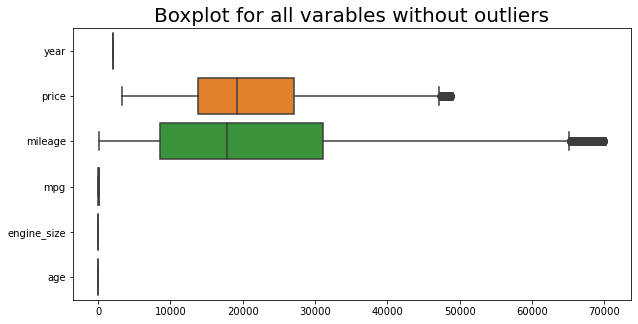

The average price of used cars is  $22,537.
The average year of used cars is  2,017.
The average mileage of used cars is  23,837.
The average mpg of used cars is  45.
The average engine_size of used cars is  2.
The average age of used cars is  4.


In [205]:
plt.figure(figsize=(10,5))
bp = sns.boxplot(data=outlier_df, orient='h')
bp.set_title('Boxplot for all varables without outliers', fontsize=20)
plt.savefig('Boxplot for all variables.png', bbox_inches='tight', dpi=300)
plt.show()
print('The average price of used cars is  ${:,.0f}.'.format(df.price.mean()))
print('The average year of used cars is  {:,.0f}.'.format(df.year.mean()))
print('The average mileage of used cars is  {:,.0f}.'.format(df.mileage.mean()))
print('The average mpg of used cars is  {:,.0f}.'.format(df.mpg.mean()))
print('The average engine_size of used cars is  {:,.0f}.'.format(df.engine_size.mean()))
print('The average age of used cars is  {:,.0f}.'.format(df.age.mean()))

In this box plot, we can clearly see that, price and mileage have high variance in comaprisions to others so, we will exclude these (2) variables and plot a box plot again to better visualize the distribution of other variables.

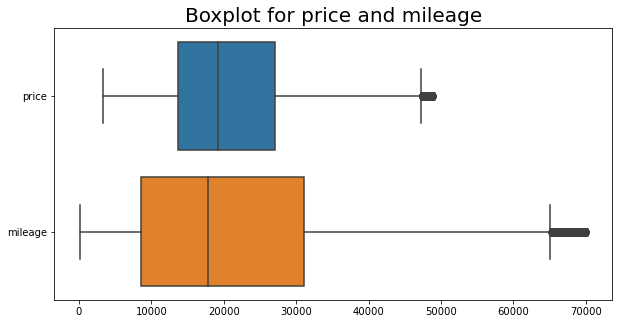

The average price of used cars is  $22,537.
The average mileage of used cars is  23,837.


In [206]:
# variables
df_1_out = outlier_df[['price','mileage']]
df_2_out = outlier_df['fuel_type']


# box plots for price and mileage
plt.figure(figsize=(10,5))
bp = sns.boxplot(data=df_1_out, orient='h')
bp.set_title('Boxplot for price and mileage', fontsize=20)
plt.savefig('Boxplot for price and mileage.png', bbox_inches='tight', dpi=300)
plt.show()
print('The average price of used cars is  ${:,.0f}.'.format(df.price.mean()))
print('The average mileage of used cars is  {:,.0f}.'.format(df.mileage.mean()))

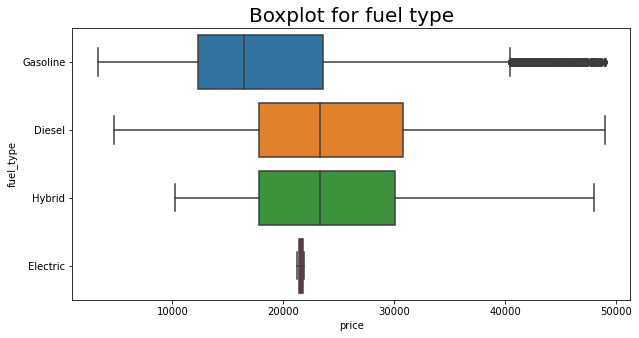

Cars running on Gasoline have an average price of $19,697.
Cars running on Diesel have an average price of $26,071.
Hybrid cars have an average price of $25,944.
Electric cars have an average price of $21,560.


In [107]:
# box plot for fuel type

plt.figure(figsize=(10,5))
bp2 = sns.boxplot(y=df_2_out, x=outlier_df.price, orient='h')
bp2.set_title('Boxplot for fuel type', fontsize=20)
plt.savefig('Boxplot for fuel type.png', bbox_inches='tight', dpi=300)
plt.show()
print('Cars running on Gasoline have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Gasoline'].mean()))
print('Cars running on Diesel have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Diesel'].mean()))
print('Hybrid cars have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Hybrid'].mean()))
print('Electric cars have an average price of ${:,.0f}.'.format(df.price[df.fuel_type=='Electric'].mean()))

In the above box plot, we can clearly see that, Fuel types like Gasoline,Diesel, and Hybrid have high variance in comaprisions to Electric.

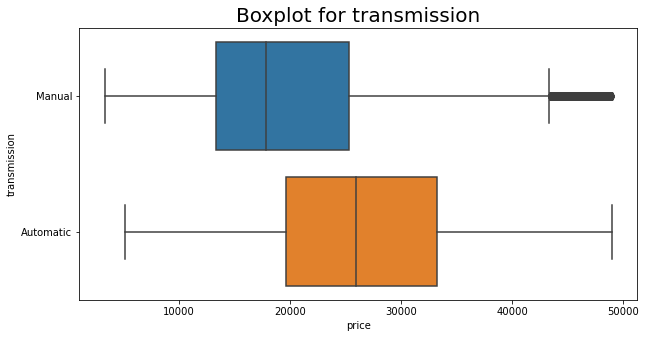

The average price of Manual cars is $20,908.
The average price of Automatic cars is $28,892.


In [108]:
# variable
df_7_out = outlier_df['transmission']
# box plot for transmission

plt.figure(figsize=(10,5))
bp2 = sns.boxplot(y=df_7_out, x=outlier_df.price, orient='h')
bp2.set_title('Boxplot for transmission', fontsize=20)
plt.savefig('Boxplot for transmission.png', bbox_inches='tight', dpi=300)
plt.show()
print('The average price of Manual cars is ${:,.0f}.'.format(df.price[df.transmission=='Manual'].mean()))
print('The average price of Automatic cars is ${:,.0f}.'.format(df.price[df.transmission=='Automatic'].mean()))

In the above box plot, Automatic cars are more popular than Manual.

21.20% of the market is a luxury car.
78.80% of the market is a nonluxury car.


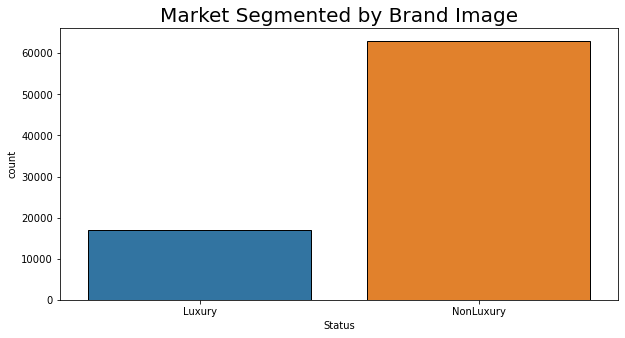

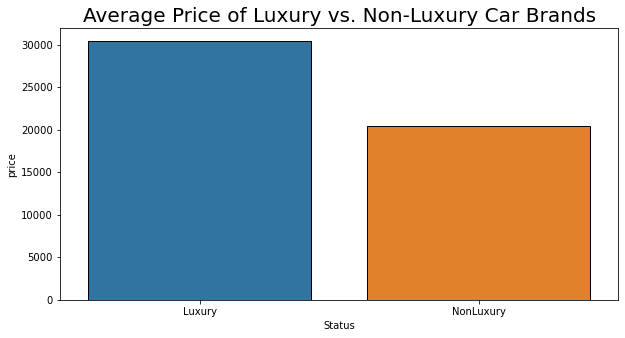

The average price for a luxury car is $30,422.
The average price for a nonluxury car is $20,415.


In [112]:
df_status = df
df_status['Status'] = ['Luxury' if (x == 'Audi')|(x == 'BMW')|(x == 'Mercedes') else 'NonLuxury' for x in  df.brand]
luxury_perc = df_status.Status[df_status.Status=='Luxury'].count()/df_status.Status.count()
nonluxury_perc = df_status.Status[df_status.Status=='NonLuxury'].count()/df_status.Status.count()

# plot market segmented by brand image
plt.figure(figsize=(10,5))
cp = sns.countplot(data=df_status, x='Status', edgecolor='black')
cp.set_title('Market Segmented by Brand Image', fontsize=20)
plt.savefig('Market Segmented by Brand Image.png', bbox_inches='tight', dpi=300)
print('{:.2%} of the market is a luxury car.'.format(luxury_perc))
print('{:.2%} of the market is a nonluxury car.'.format(nonluxury_perc))

# plot average price of luxury vs nonluxury cars
plt.figure(figsize=(10,5))
bp = sns.barplot(data=df_status, x='Status', y='price', edgecolor='black', ci=None)
bp.set_title('Average Price of Luxury vs. Non-Luxury Car Brands', fontsize=20)
plt.savefig('Average Price of Luxury vs Non-Luxury Car Brands.png', bbox_inches='tight', dpi=300)
plt.show()

# Price comparison between car status
print('The average price for a luxury car is ${:,.0f}.'.format(df_status.price[df_status.Status == 'Luxury'].mean()))
print('The average price for a nonluxury car is ${:,.0f}.'.format(df_status.price[df_status.Status == 'NonLuxury'].mean()))

According to the above graph, nonluxury cars are more popular and having a better market than luxury cars, But luxury cars are more expensive than nonluxury cars.

The average price for a(n) Audi is $30,495.
The average price for a(n) BMW is $30,350.
The average price for a(n) Ford is $16,668.
The average price for a(n) Hyundi is $17,082.
The average price for a(n) Merc is $32,882.
The average price for a(n) Skoda is $19,211.
The average price for a(n) Toyota is $16,924.
The average price for a(n) Vauxhall is $14,129.
The average price for a(n) VW is $22,761.


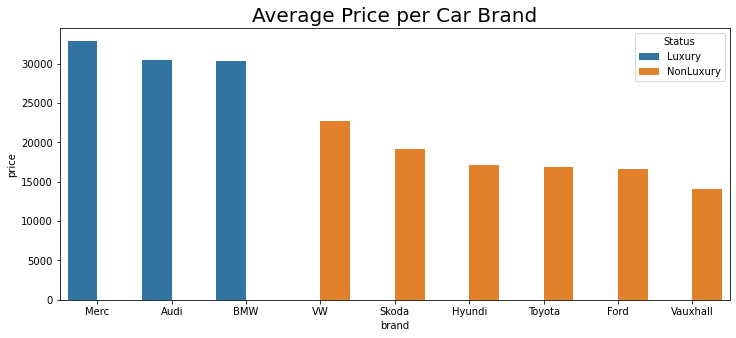

In [111]:
df_status.groupby('brand').mean().sort_values('price',ascending=False).price
result = ['Merc','Audi','BMW','VW','Skoda','Hyundi','Toyota','Ford','Vauxhall']

# Plot for brands
plt.figure(figsize=(12,5))
sns.barplot(data=df_status, x='brand', y='price', hue='Status', order=result, ci=None)
plt.title('Average Price per Car Brand', fontsize=20)
plt.savefig('Average Price per Car Brand.png', bbox_inches='tight', dpi=300)

# Print average price of brands
brands = ['Audi','BMW','Ford','Hyundi','Merc','Skoda','Toyota','Vauxhall','VW']
for i in brands:
    print('The average price for a(n) {} is ${:,.0f}.'.format(i, df.price[df.brand==i].mean()))

According to the above graph Mercedes, Audi, and BMW are luxury cars. Others are nonluxury cars.

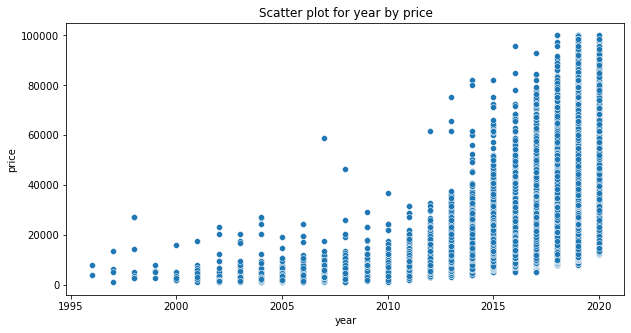

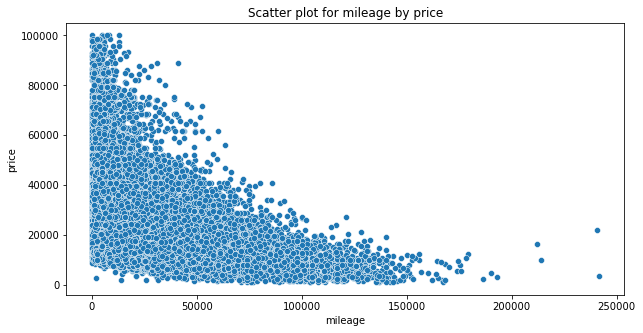

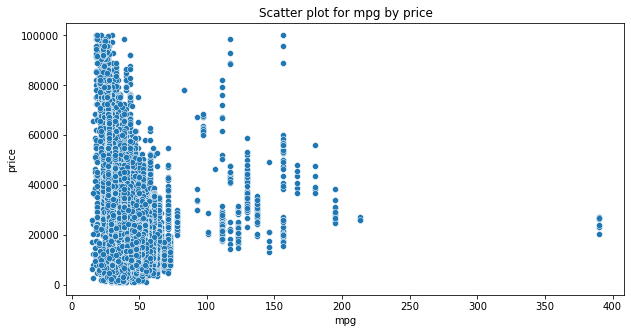

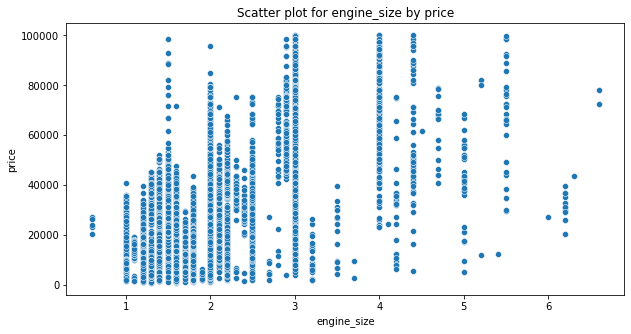

In [113]:
num_val = ['year','mileage','mpg','engine_size']
#sns.set_palette('muted')
for i in num_val:
    plt.figure(figsize=(10,5))
    g = sns.scatterplot(data=df, x=df[i], y=df['price'], alpha=1)
    plt.title('Scatter plot for {} by price'.format(i))
    plt.savefig('Scatter plot for {} by price.png'.format(i),bbox_inches='tight', dpi=300)
    plt.show()

In the above Scatter plots, we can clearly identify that, Scatter Plot for mileage by price shows a negative trend. When mileage tends to increase and price tends to decrease.
Scatter plots like year by price and engine_size by price show no trend (correlation) because there is no obvious pattern.

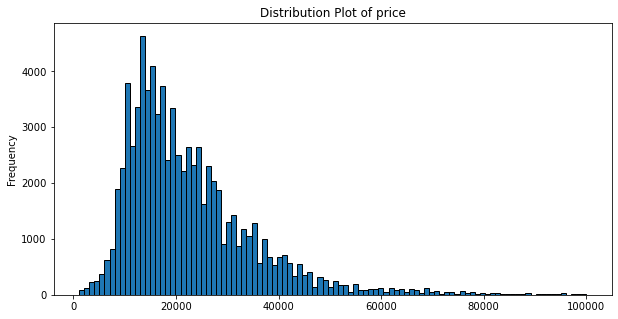

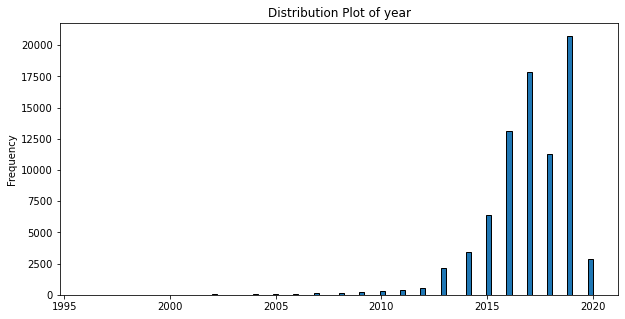

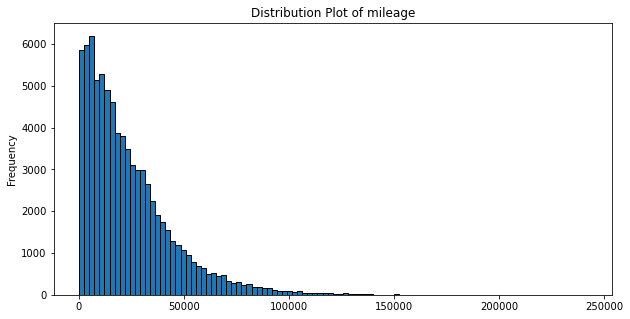

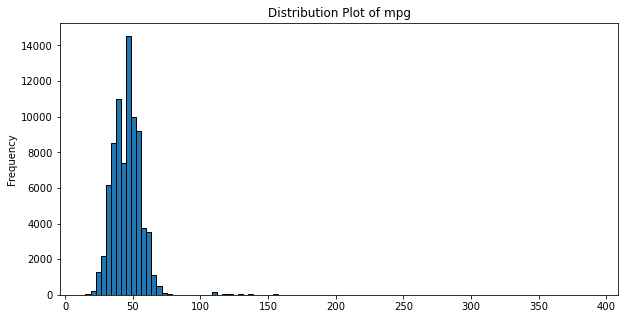

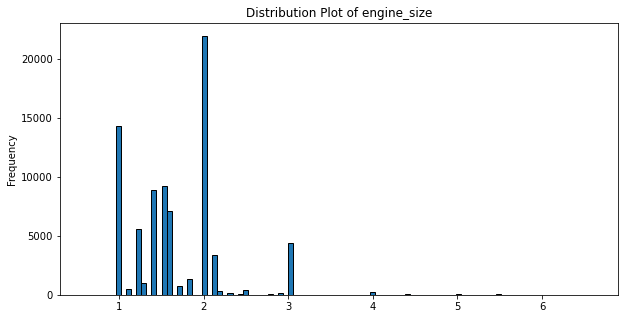

In [114]:
var = ['price','year','mileage','mpg','engine_size']
hist_ = {}
for i in var:
    plt.figure(figsize=(10,5))
    hist_[i]= df[i].plot.hist(bins=100, edgecolor='black')
    hist_[i].set_title('Distribution Plot of {}'.format(i))
    plt.savefig('Distribution Plot of {}.png'.format(i),bbox_inches='tight', dpi=300)
    plt.show()

We can clearly identify that, distribution plots of price, mileage,mpg and engine_size show right Skewed Curves: Mean and Median: in a right skewed distribution, the mean is on the right closer to the tail of the distribution. The median is located at the center of the data. Only distribution plot of year shows left Skewed Curve

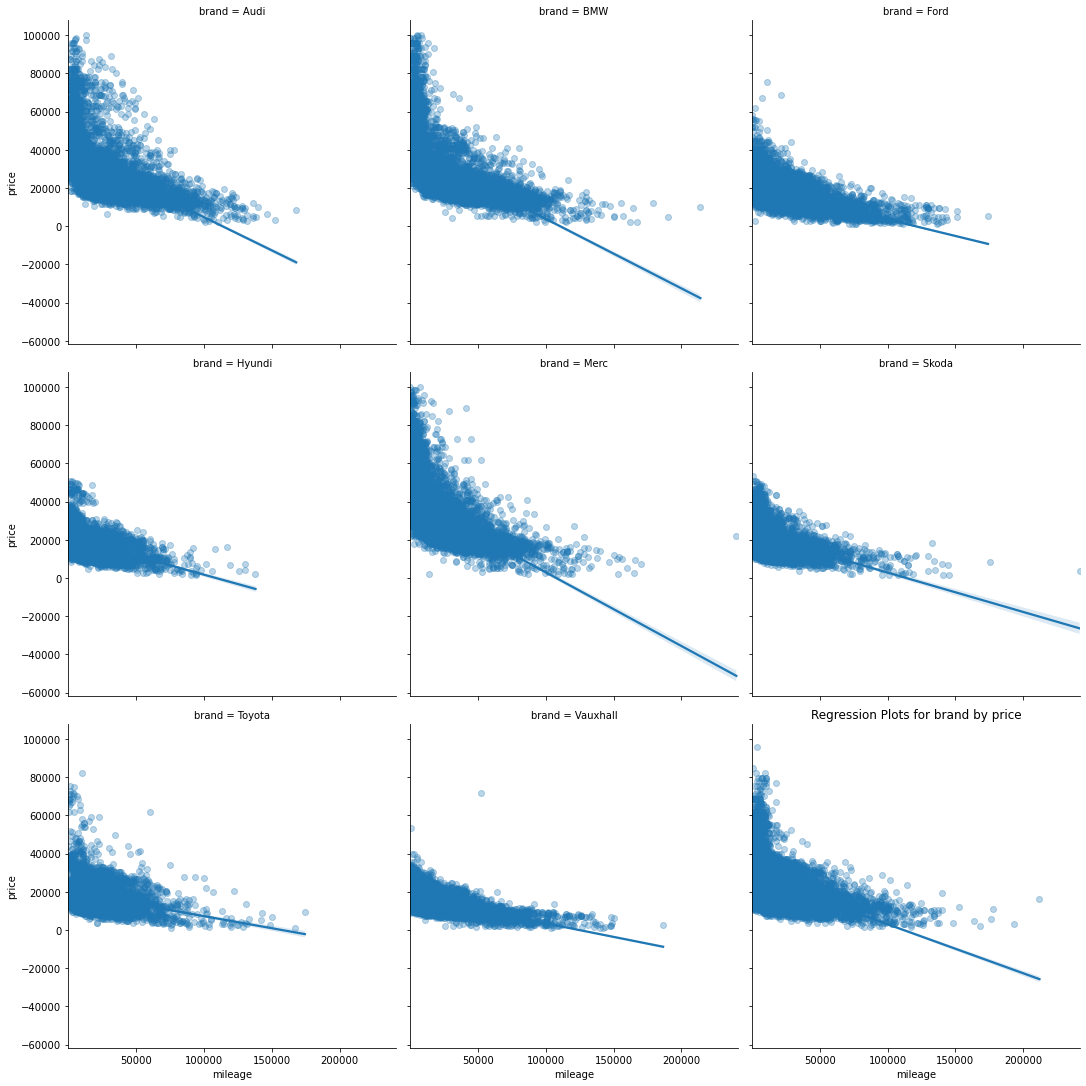

In [208]:
plt.rcParams['figure.figsize'] = (15,5)
sns.set_palette('tab10')
g = sns.lmplot(data=df, x='mileage', y='price', col='brand', col_wrap=3, height=5, aspect=1, scatter_kws={'alpha':0.3})
plt.savefig('Regression Plots.png',bbox_inches='tight', dpi=300)
plt.show()

In the all Regression plots, we can clearly see that, there is a negative trend. When mileage tends to increase and price tends to decrease.

In [127]:
# Check price variance
df.price.var()
price_var = 'Price Variance: ' + str("{0:.2f}".format(df.price.var()))

In [128]:
price_var

'Price Variance: 160110988.19'

In [129]:
# log transform price variance to normalize data
df['price_log'] = np.log(df.price)
df.price_log.var()
price_log_var = 'Price Log Variance: ' + str("{0:.2f}".format(df.price_log.var()))

In [130]:
price_log_var

'Price Log Variance: 0.28'

In [131]:
df

,brand,model,year,price,transmission,mileage,fuel_type,mpg,engine_size,age,Status,price_log
0,Audi,A1,2017,17125,Manual,15735,Gasoline,45,1.4,4,Luxury,9.748295
1,Audi,A6,2016,22605,Automatic,36203,Diesel,53,2.0,5,Luxury,10.025926
2,Audi,A1,2016,15070,Manual,29946,Gasoline,45,1.4,5,Luxury,9.620461
3,Audi,A4,2017,23016,Automatic,25952,Diesel,55,2.0,4,Luxury,10.043945
13,Audi,A3,2017,22468,Manual,21695,Gasoline,48,1.4,4,Luxury,10.019847
...,...,...,...,...,...,...,...,...,...,...,...,...
15152,VW,Eos,2012,8206,Manual,74000,Diesel,48,2.0,9,NonLuxury,9.012621
15153,VW,Fox,2008,2464,Manual,88102,Gasoline,38,1.2,13,NonLuxury,7.809541
15154,VW,Fox,2009,2178,Manual,70000,Gasoline,34,1.4,12,NonLuxury,7.686162
15155,VW,Fox,2006,1712,Manual,82704,Gasoline,38,1.2,15,NonLuxury,7.445418


transform transmission and fuel_type variables into numerical values.

In [134]:
# One important encoding for 'transmission'
df_dummy = pd.get_dummies(df.transmission)
df_dummy2 = pd.get_dummies(df.fuel_type)
df_combined = [df, df_dummy, df_dummy2]

# Horizontally concatenate the encoded series with the dataframe 
data = pd.concat(df_combined, axis=1)

# Drop column 'transmission'
data = data.drop(['transmission', 'fuel_type'], axis=1)
data

,brand,model,year,price,mileage,mpg,engine_size,age,Status,price_log,Automatic,Manual,Diesel,Electric,Gasoline,Hybrid
0,Audi,A1,2017,17125,15735,45,1.4,4,Luxury,9.748295,0,1,0,0,1,0
1,Audi,A6,2016,22605,36203,53,2.0,5,Luxury,10.025926,1,0,1,0,0,0
2,Audi,A1,2016,15070,29946,45,1.4,5,Luxury,9.620461,0,1,0,0,1,0
3,Audi,A4,2017,23016,25952,55,2.0,4,Luxury,10.043945,1,0,1,0,0,0
13,Audi,A3,2017,22468,21695,48,1.4,4,Luxury,10.019847,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,VW,Eos,2012,8206,74000,48,2.0,9,NonLuxury,9.012621,0,1,1,0,0,0
15153,VW,Fox,2008,2464,88102,38,1.2,13,NonLuxury,7.809541,0,1,0,0,1,0
15154,VW,Fox,2009,2178,70000,34,1.4,12,NonLuxury,7.686162,0,1,0,0,1,0
15155,VW,Fox,2006,1712,82704,38,1.2,15,NonLuxury,7.445418,0,1,0,0,1,0


categorical variable, Brand, by one importantt encoding.

In [135]:
# Get one important encoding for column 'Brand'
data_dummy = pd.get_dummies(data['brand'])
data_combined = [data, data_dummy]

# Concatenate the encoded df horizontally
data = pd.concat(data_combined, axis=1)

# Drop the Column Brand and Model
data = data.drop('brand', axis=1)
data

,model,year,price,mileage,mpg,engine_size,age,Status,price_log,Automatic,...,Hybrid,Audi,BMW,Ford,Hyundi,Merc,Skoda,Toyota,VW,Vauxhall
0,A1,2017,17125,15735,45,1.4,4,Luxury,9.748295,0,...,0,1,0,0,0,0,0,0,0,0
1,A6,2016,22605,36203,53,2.0,5,Luxury,10.025926,1,...,0,1,0,0,0,0,0,0,0,0
2,A1,2016,15070,29946,45,1.4,5,Luxury,9.620461,0,...,0,1,0,0,0,0,0,0,0,0
3,A4,2017,23016,25952,55,2.0,4,Luxury,10.043945,1,...,0,1,0,0,0,0,0,0,0,0
13,A3,2017,22468,21695,48,1.4,4,Luxury,10.019847,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,8206,74000,48,2.0,9,NonLuxury,9.012621,0,...,0,0,0,0,0,0,0,0,1,0
15153,Fox,2008,2464,88102,38,1.2,13,NonLuxury,7.809541,0,...,0,0,0,0,0,0,0,0,1,0
15154,Fox,2009,2178,70000,34,1.4,12,NonLuxury,7.686162,0,...,0,0,0,0,0,0,0,0,1,0
15155,Fox,2006,1712,82704,38,1.2,15,NonLuxury,7.445418,0,...,0,0,0,0,0,0,0,0,1,0


### Key Segmentation Analysis
Segment the dataframe into luxury vs non-luxury brands

In [202]:
data_seg = data.copy()
data_seg['luxury'] = np.select([data_seg.Audi == 1, data_seg.BMW == 1, data_seg.Merc == 1], [1,1,1])
data_seg['nonluxury'] = np.select([data_seg.luxury == 0], [1])
data_seg = data_seg.drop(['Audi','BMW','Ford','Hyundi','Merc','Skoda','Toyota','Vauxhall','VW'],axis=1)
data_seg

,model,year,price,mileage,mpg,engine_size,age,Status,price_log,Automatic,Manual,Diesel,Electric,Gasoline,Hybrid,luxury,nonluxury
0,A1,2017,17125,15735,45,1.4,4,Luxury,9.748295,0,1,0,0,1,0,1,0
1,A6,2016,22605,36203,53,2.0,5,Luxury,10.025926,1,0,1,0,0,0,1,0
2,A1,2016,15070,29946,45,1.4,5,Luxury,9.620461,0,1,0,0,1,0,1,0
3,A4,2017,23016,25952,55,2.0,4,Luxury,10.043945,1,0,1,0,0,0,1,0
13,A3,2017,22468,21695,48,1.4,4,Luxury,10.019847,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,8206,74000,48,2.0,9,NonLuxury,9.012621,0,1,1,0,0,0,0,1
15153,Fox,2008,2464,88102,38,1.2,13,NonLuxury,7.809541,0,1,0,0,1,0,0,1
15154,Fox,2009,2178,70000,34,1.4,12,NonLuxury,7.686162,0,1,0,0,1,0,0,1
15155,Fox,2006,1712,82704,38,1.2,15,NonLuxury,7.445418,0,1,0,0,1,0,0,1


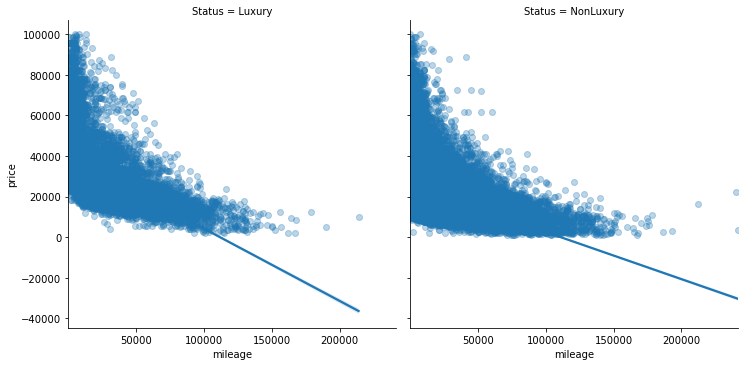

In [203]:
plt.rcParams['figure.figsize'] = (15,5)
sns.set_palette('tab10')
g = sns.lmplot(data=data_seg, x='mileage', y='price', col='Status', col_wrap=3, height=5, aspect=1, scatter_kws={'alpha':0.3})
plt.savefig('Regression Plots.png',bbox_inches='tight', dpi=300)
plt.show()

### Key Inferential Statistical Analysis
Using Seaborn's heatmap function to show the correlations (including R Squared) for all variables

In [220]:
df.corr()

,year,price,mileage,mpg,engine_size,age,price_log
year,1.000000,0.509879,-0.737612,-0.135870,-0.053713,-1.000000,0.629175
price,0.509879,1.000000,-0.425826,-0.335357,0.633651,-0.509879,0.930452
mileage,-0.737612,-0.425826,1.000000,0.202096,0.126924,0.737612,-0.506500
mpg,-0.135870,-0.335357,0.202096,1.000000,-0.249963,0.135870,-0.278653
engine_size,-0.053713,0.633651,0.126924,-0.249963,1.000000,0.053713,0.574000
age,-1.000000,-0.509879,0.737612,0.135870,0.053713,1.000000,-0.629175
price_log,0.629175,0.930452,-0.506500,-0.278653,0.574000,-0.629175,1.000000


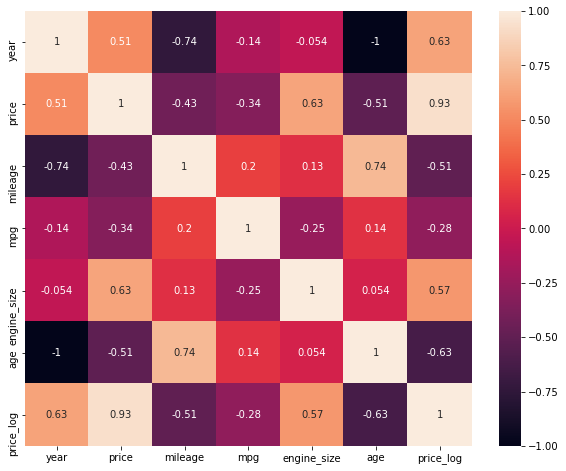

In [251]:
# plot coorelation heat map
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)
plt.show()

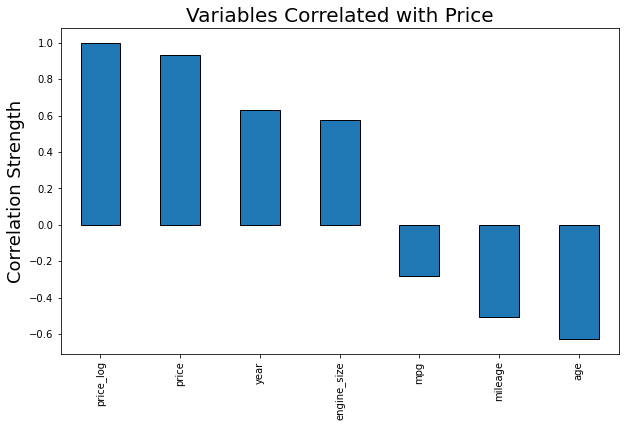

In [234]:
# Plot bargraph of correlation variables related to price
plt.figure(figsize=(10,6))
corr = df_corr.sort_values('price_log', ascending=False)
corr['price_log'].plot(kind='bar', edgecolor='black')
plt.ylabel('Correlation Strength', fontsize=18)
plt.title('Variables Correlated with Price', fontsize=20)
plt.show()

In [284]:
# Drop the Column Brand and Model
df = df.drop('price', axis=1)
df

,model,year,transmission,mileage,fuel_type,mpg,engine_size,age,Status,price_log
0,A1,2017,Manual,15735,Gasoline,45,1.4,4,Luxury,9.748295
1,A6,2016,Automatic,36203,Diesel,53,2.0,5,Luxury,10.025926
2,A1,2016,Manual,29946,Gasoline,45,1.4,5,Luxury,9.620461
3,A4,2017,Automatic,25952,Diesel,55,2.0,4,Luxury,10.043945
13,A3,2017,Manual,21695,Gasoline,48,1.4,4,Luxury,10.019847
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,Manual,74000,Diesel,48,2.0,9,NonLuxury,9.012621
15153,Fox,2008,Manual,88102,Gasoline,38,1.2,13,NonLuxury,7.809541
15154,Fox,2009,Manual,70000,Gasoline,34,1.4,12,NonLuxury,7.686162
15155,Fox,2006,Manual,82704,Gasoline,38,1.2,15,NonLuxury,7.445418


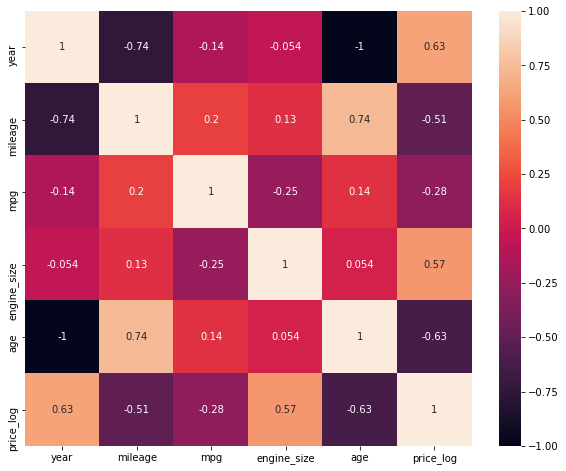

In [285]:
# plot coorelation heat map
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)
plt.show()

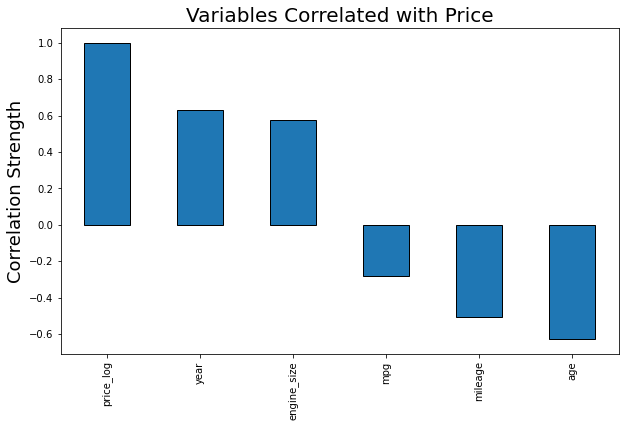

In [286]:
# Plot bargraph of correlation variables related to price
plt.figure(figsize=(10,6))
corr = df_corr.sort_values('price_log', ascending=False)
corr['price_log'].plot(kind='bar', edgecolor='black')
plt.ylabel('Correlation Strength', fontsize=18)
plt.title('Variables Correlated with Price', fontsize=20)
plt.show()

In [280]:
# Drop the Column Brand and Model
data = data.drop('price', axis=1)
data

,model,year,mileage,mpg,engine_size,age,Status,price_log,Automatic,Manual,...,Hybrid,Audi,BMW,Ford,Hyundi,Merc,Skoda,Toyota,VW,Vauxhall
0,A1,2017,15735,45,1.4,4,Luxury,9.748295,0,1,...,0,1,0,0,0,0,0,0,0,0
1,A6,2016,36203,53,2.0,5,Luxury,10.025926,1,0,...,0,1,0,0,0,0,0,0,0,0
2,A1,2016,29946,45,1.4,5,Luxury,9.620461,0,1,...,0,1,0,0,0,0,0,0,0,0
3,A4,2017,25952,55,2.0,4,Luxury,10.043945,1,0,...,0,1,0,0,0,0,0,0,0,0
13,A3,2017,21695,48,1.4,4,Luxury,10.019847,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,74000,48,2.0,9,NonLuxury,9.012621,0,1,...,0,0,0,0,0,0,0,0,1,0
15153,Fox,2008,88102,38,1.2,13,NonLuxury,7.809541,0,1,...,0,0,0,0,0,0,0,0,1,0
15154,Fox,2009,70000,34,1.4,12,NonLuxury,7.686162,0,1,...,0,0,0,0,0,0,0,0,1,0
15155,Fox,2006,82704,38,1.2,15,NonLuxury,7.445418,0,1,...,0,0,0,0,0,0,0,0,1,0


In [221]:
data.corr()

,year,price,mileage,mpg,engine_size,age,price_log,Automatic,Manual,Diesel,...,Hybrid,Audi,BMW,Ford,Hyundi,Merc,Skoda,Toyota,VW,Vauxhall
year,1.000000,0.509879,-0.737612,-0.135870,-0.053713,-1.000000,0.629175,-0.008869,0.008869,-0.079409,...,0.006285,0.000198,-0.011428,-0.048665,0.005171,0.044303,0.051707,-0.036323,0.032102,-0.024521
price,0.509879,1.000000,-0.425826,-0.335357,0.633651,-0.509879,0.930452,0.254292,-0.254292,0.236573,...,0.046058,0.215814,0.213374,-0.225695,-0.093577,0.320968,-0.065319,-0.115043,0.007654,-0.267456
mileage,-0.737612,-0.425826,1.000000,0.202096,0.126924,0.737612,-0.506500,0.022713,-0.022713,0.234688,...,0.005000,0.031056,0.052223,0.001948,-0.020389,-0.024159,-0.037046,-0.006521,-0.019189,0.009433
mpg,-0.135870,-0.335357,0.202096,1.000000,-0.249963,0.135870,-0.278653,-0.024794,0.024794,0.193294,...,0.385381,-0.099039,0.005656,0.092468,-0.014303,0.010523,0.027357,0.152816,-0.041237,-0.106427
engine_size,-0.053713,0.633651,0.126924,-0.249963,1.000000,0.053713,0.574000,0.308047,-0.308047,0.520242,...,0.041234,0.166585,0.327037,-0.275268,-0.078459,0.287325,-0.108314,-0.091233,-0.048146,-0.173808
age,-1.000000,-0.509879,0.737612,0.135870,0.053713,1.000000,-0.629175,0.008869,-0.008869,0.079409,...,-0.006285,-0.000198,0.011428,0.048665,-0.005171,-0.044303,-0.051707,0.036323,-0.032102,0.024521
price_log,0.629175,0.930452,-0.506500,-0.278653,0.574000,-0.629175,1.000000,0.263573,-0.263573,0.259615,...,0.069044,0.218648,0.211127,-0.220851,-0.098195,0.321329,-0.055014,-0.126898,0.034749,-0.298191
Automatic,-0.008869,0.254292,0.022713,-0.024794,0.308047,0.008869,0.263573,1.000000,-1.000000,0.119484,...,0.289420,0.046190,0.120456,-0.150301,-0.034724,0.172409,-0.021210,0.119532,-0.077815,-0.113814
Manual,0.008869,-0.254292,-0.022713,0.024794,-0.308047,-0.008869,-0.263573,-1.000000,1.000000,-0.119484,...,-0.289420,-0.046190,-0.120456,0.150301,0.034724,-0.172409,0.021210,-0.119532,0.077815,0.113814
Diesel,-0.079409,0.236573,0.234688,0.193294,0.520242,0.079409,0.259615,0.119484,-0.119484,1.000000,...,-0.144849,0.075479,0.173348,-0.094310,-0.040555,0.229881,-0.044609,-0.178545,0.005291,-0.165892


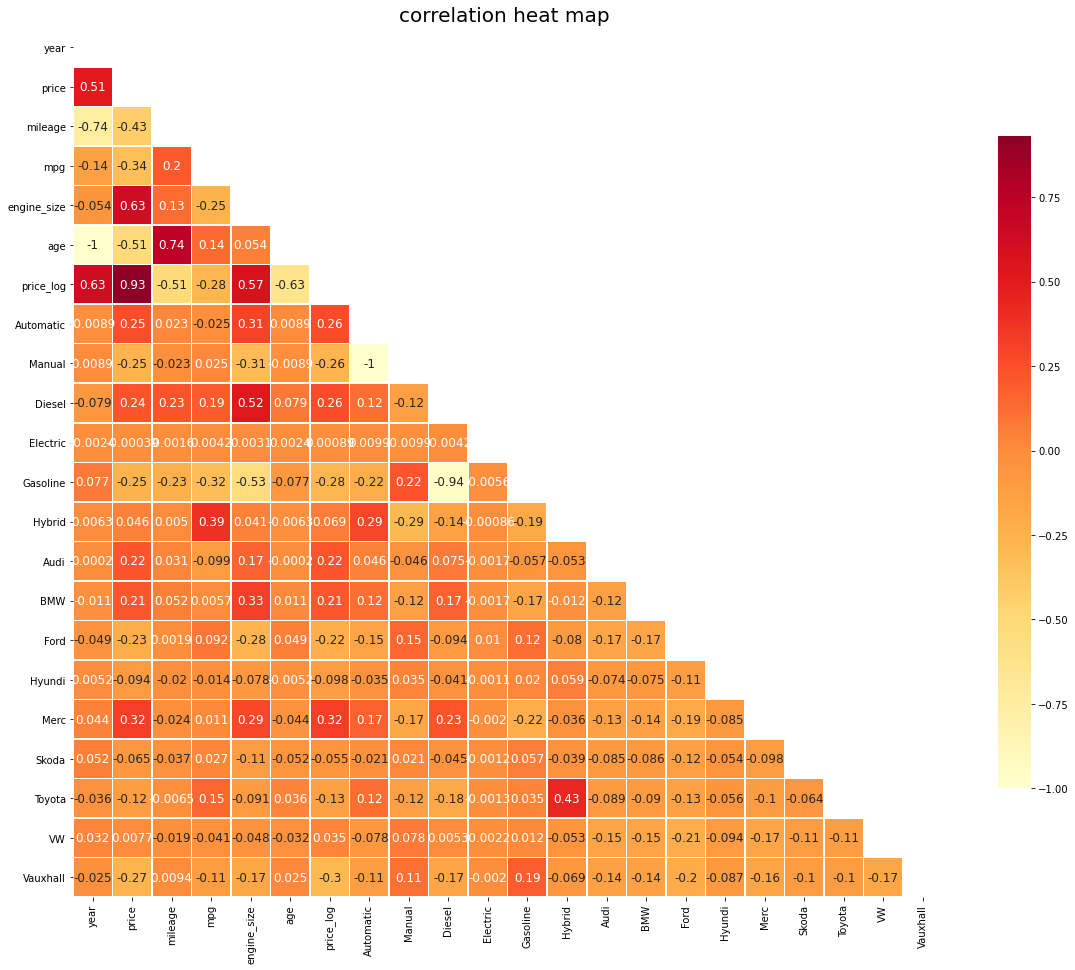

In [136]:
plt.rcParams['figure.figsize'] = (20,16)
corr = data.corr(method='pearson')

# Mask the upper triangular matrix and make a heatmap showing only the lower triangular matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heat map
sns.heatmap(corr, cmap='YlOrRd', mask=mask, annot=True, annot_kws={"size":12}, center=0, linewidths='.5', square=True, cbar_kws={"shrink":.75})
plt.savefig('Correlation Matrix.png',bbox_inches='tight', dpi=300)
plt.title('correlation heat map ', fontsize=20)
plt.show()

In the heatmap above, we observe that independent variables like year,age and mileage are highly correlated. If these variables are used in the regression analysis, it will cause collinearity. Thus, we will run our regression with these variables separately to avoid collinearity and select the variable with a higher statistical signficance or the model with a better fit.

In [224]:
df.corr()

,year,price,mileage,mpg,engine_size,age,price_log
year,1.000000,0.509879,-0.737612,-0.135870,-0.053713,-1.000000,0.629175
price,0.509879,1.000000,-0.425826,-0.335357,0.633651,-0.509879,0.930452
mileage,-0.737612,-0.425826,1.000000,0.202096,0.126924,0.737612,-0.506500
mpg,-0.135870,-0.335357,0.202096,1.000000,-0.249963,0.135870,-0.278653
engine_size,-0.053713,0.633651,0.126924,-0.249963,1.000000,0.053713,0.574000
age,-1.000000,-0.509879,0.737612,0.135870,0.053713,1.000000,-0.629175
price_log,0.629175,0.930452,-0.506500,-0.278653,0.574000,-0.629175,1.000000


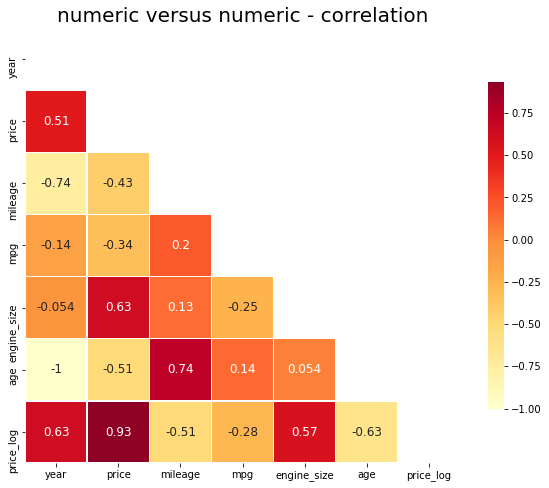

In [227]:
plt.rcParams['figure.figsize'] = (10,8)
corr = df.corr(method='pearson')

# Mask the upper triangular matrix and make a heatmap showing only the lower triangular matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot correlation heat map
sns.heatmap(corr, cmap='YlOrRd', mask=mask, annot=True, annot_kws={"size":12}, center=0, linewidths='.5', square=True, cbar_kws={"shrink":.75})
plt.savefig('Correlation Matrix.png',bbox_inches='tight', dpi=300)
plt.title('numeric versus numeric - correlation', fontsize=20)
plt.show()

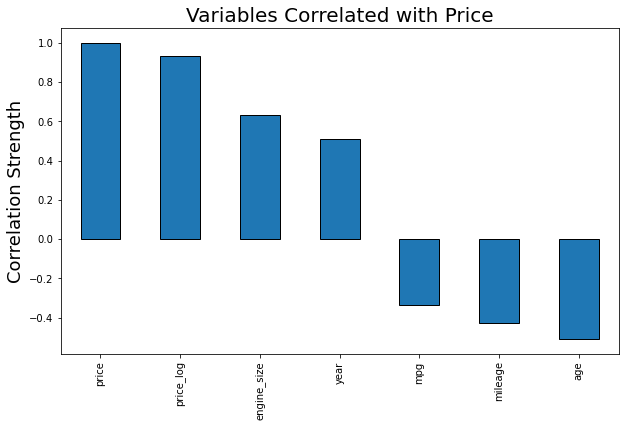

In [140]:
# Plot bargraph of correlation variables related to price_log
plt.figure(figsize=(10,6))
corr = corr.sort_values('price', ascending=False)
corr['price'].plot(kind='bar', edgecolor='black')
plt.ylabel('Correlation Strength', fontsize=18)
plt.title('Variables Correlated with Price', fontsize=20)
plt.show()

In [173]:
contigency= pd.crosstab(df['transmission'], df['fuel_type']) 
contigency

fuel_type,Diesel,Electric,Gasoline,Hybrid
transmission,,,,
Automatic,8712,2,5585,2013
Manual,24682,0,38695,259


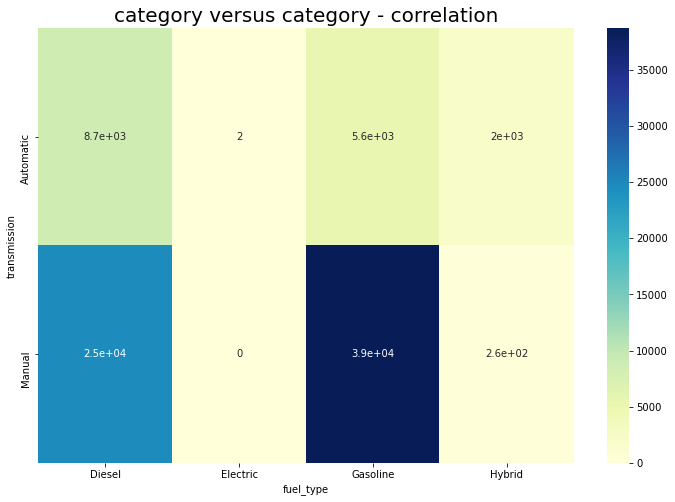

In [175]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")
plt.savefig('Correlation Matrix.png',bbox_inches='tight', dpi=300)
plt.title('category versus category - correlation', fontsize=20)
plt.show()

In [179]:
contigency2= pd.crosstab(df['transmission'], df['brand']) 
contigency2

brand,Audi,BMW,Ford,Hyundi,Merc,Skoda,Toyota,VW,Vauxhall
transmission,,,,,,,,,
Automatic,2175,2938,1218,502,4068,789,1964,1654,1004
Manual,6246,5590,14090,3095,6609,3862,3075,10927,10142


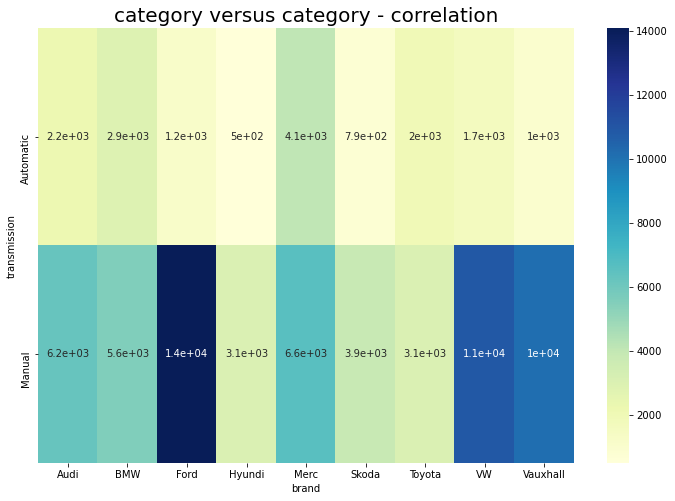

In [180]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency2, annot=True, cmap="YlGnBu")
plt.savefig('Correlation Matrix.png',bbox_inches='tight', dpi=300)
plt.title('category versus category - correlation', fontsize=20)
plt.show()

#### Regression Analysis: All Variables

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 3.248e+04
Date:                Wed, 24 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:00:00   Log-Likelihood:                 15983.
No. Observations:               79948   AIC:                        -3.193e+04
Df Residuals:                   79932   BIC:                        -3.179e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5674      0.019    289.550      

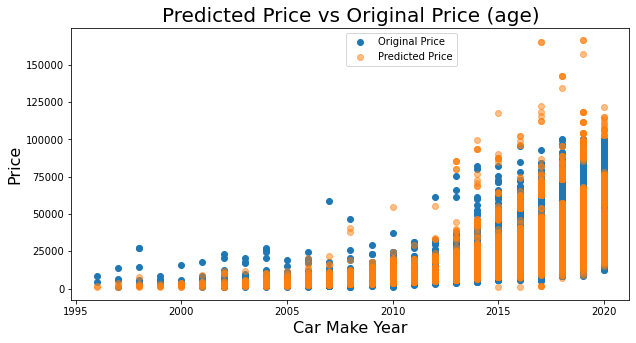

In [255]:
predictor_year = ['age','mpg','engine_size','Automatic','Manual','Gasoline', 'Diesel', 'Hybrid', 'Electric','Audi','BMW','Ford','Hyundi','Merc','Skoda','Toyota','Vauxhall','VW']
dependentVar = data['price_log']
# regression analysis using year
df_data = data[predictor_year]
df_data = sm.add_constant(df_data)
x1_year = df_data
y = dependentVar
olsres_year = sm.OLS(y,x1_year).fit()
print(olsres_year.summary())
print(olsres_year.pvalues)
print(olsres_year.params)

# Validate Predictions
plt.figure(figsize=(10,5))
plt.scatter(x=data['year'], y=data['price'], label='Original Price')
plt.scatter(x=data['year'],y=np.exp(olsres_year.predict(x1_year)), alpha=.5, label='Predicted Price')
plt.legend(bbox_to_anchor=(0.7,1), loc="best")
plt.xlabel('Car Make Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Predicted Price vs Original Price (age)', fontsize=20)
plt.savefig('Predicted Price vs Original Price.png', bbox_inches='tight', dpi=300)
plt.show()

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.885e+04
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:38:56   Log-Likelihood:                -1889.1
No. Observations:               79948   AIC:                             3810.
Df Residuals:                   79932   BIC:                             3959.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.4136      0.024    225.110      

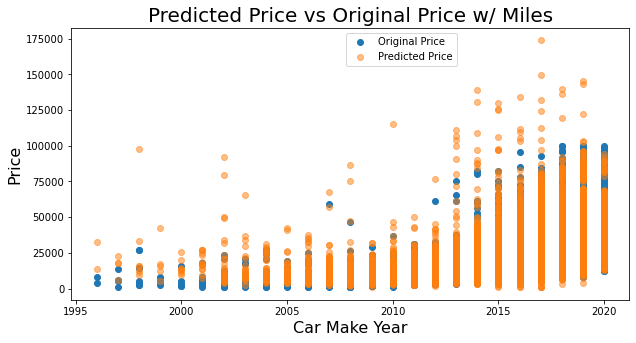

In [144]:
predictor_miles = ['mileage','mpg','engine_size','Automatic','Manual','Gasoline', 'Diesel', 'Hybrid', 'Electric','Audi','BMW','Ford','Hyundi','Merc','Skoda','Toyota','Vauxhall','VW']
dependentVar = data['price_log']

# regression analysis using mileage
df_data = data[predictor_miles]
df_data = sm.add_constant(df_data)
x1_miles = df_data
y = dependentVar
olsres_miles = sm.OLS(y,x1_miles).fit()
print(olsres_miles.summary())
print(olsres_miles.pvalues)
print(olsres_miles.params)

# Validate Predictions
plt.figure(figsize=(10,5))
plt.scatter(x=data['year'], y=data['price'], label='Original Price')
plt.scatter(x=data['year'],y=np.exp(olsres_miles.predict(x1_miles)), alpha=.5, label='Predicted Price')
plt.legend(bbox_to_anchor=(0.7,1), loc="best")
plt.xlabel('Car Make Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Predicted Price vs Original Price w/ Miles', fontsize=20)
plt.savefig('Predicted Price vs Original Price with Miles.png', bbox_inches='tight', dpi=300)

P-values for both year and mileage are extremely small. We look at the model with the better fit. The model with age as a predictor variable has a R^2 value of 0.859. The model with mileage as a predictor variable has a R^2 value of 0.78. Therefore, we can conclude that age is more significant and a better predictor than mileage.

### Segmentation Analysis
Segment the dataframe into luxury vs non-luxury brands

Using segmented data of luxury vs non-luxury brands

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 4.680e+04
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:23:50   Log-Likelihood:                 7119.2
No. Observations:               79948   AIC:                        -1.422e+04
Df Residuals:                   79939   BIC:                        -1.414e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -136.4909      0.340   -400.897      

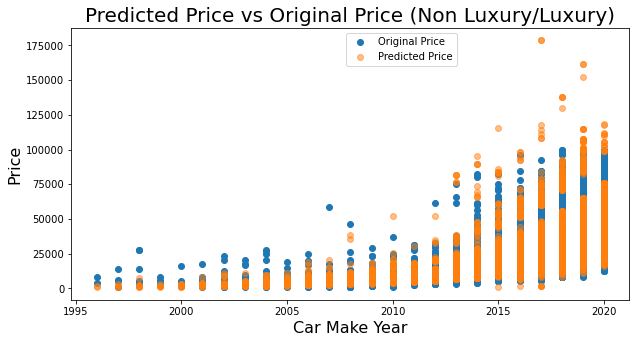

In [152]:
predictor_brands = ['year','mpg','engine_size','Automatic','Manual','Gasoline', 'Diesel', 'Hybrid', 'Electric','luxury','nonluxury']
dependentVar2 = data_seg['price_log']

# regression analysis 
df_data_seg = data_seg[predictor_brands]
df_data_seg = sm.add_constant(df_data_seg)
x3 = df_data_seg
y = dependentVar2
olsres_seg = sm.OLS(y,x3).fit()
print(olsres_seg.summary())
print(olsres_seg.params)

# Validate Predictions
plt.figure(figsize=(10,5))
plt.scatter(x=data_seg['year'], y=data_seg['price'], label='Original Price')
plt.scatter(x=data_seg['year'],y=np.exp(olsres_seg.predict(x3)), alpha=.5, label='Predicted Price')
plt.legend(bbox_to_anchor=(0.7,1), loc="best")
plt.xlabel('Car Make Year', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Predicted Price vs Original Price (Non Luxury/Luxury)', fontsize=20)
plt.savefig('Predicted Price vs Original Price (Luxury).png', bbox_inches='tight', dpi=300)

Segmenting the dataset by a car's luxury or non-luxury brand provides a 82.5% fit for the model. Although this segmentation is not as accurate compared to our original model of 85.9% fit, it is still useful for consumers shopping for used cars without a specific brand in mind.

### Conclusion
For consumers interested in shopping for used cars without specific brand, I can predict the car price with a 85.9% accuracy given the following variables: year, mpg, engine size, transimssion (automatic or manual), fuel type (gasoline, diesel, hybrid, or electric), and brand (Audi, BMW, Ford, Hyundai, Mercedes, Skoda, Toyota, Vauxhall, or Volkswagen).
    For consumers with a specific brand preference, I can predict the car price with a 82.5% accuracy given the following variables: year, mpg, engine size, transimssion (automatic or manual), fuel type (gasoline, diesel, hybrid, or electric), and brand (luxurious or non luxurious brand). 